In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


## Importing Libraries

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2,mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV
from sklearn.model_selection import cross_val_score, ShuffleSplit, permutation_test_score, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn import tree


## Loading the dataset 

In [4]:
train_data=pd.read_csv('../input/marketing-strategy-personalised-offer/train_data.csv')
test_data=pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')
example=pd.read_csv('../input/marketing-strategy-personalised-offer/sample.csv')

In [5]:
print("Shape of Train data :",train_data.shape) #Shape of Train Data
print("Shape of Test data :",test_data.shape) #Shape of Train Data

Shape of Train data : (12379, 31)
Shape of Test data : (5305, 30)


In [6]:
#Encoding 'Offer Accepted' to 0&1
train_data['Offer Accepted']=np.where(train_data['Offer Accepted']=='Yes',1,0)
train_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,0
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,1
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,1
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,0
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,0


#### Data Types for Various Features

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

There are 12 Numerical & 18 Categorical variables


#### Unique Values 

In [8]:
train_data.nunique()

offer expiration                         2
income_range                             9
no_visited_Cold drinks                   5
travelled_more_than_15mins_for_offer     2
Restaur_spend_less_than20                5
Marital Status                           5
restaurant type                          5
age                                      8
Prefer western over chinese              2
travelled_more_than_25mins_for_offer     2
travelled_more_than_5mins_for_offer      1
no_visited_bars                          5
gender                                   2
car                                      5
restuarant_same_direction_house          2
Cooks regularly                          2
Customer type                            4
Qualification                            6
is foodie                                2
no_Take-aways                            5
Job/Job Industry                        25
restuarant_opposite_direction_house      2
has Children                             2
visit resta

**Binary Features :-** `'offer expiration'`,`'travelled_more_than_15mins_for_offer'`,`'Prefer western over chinese'`,`'travelled_more_than_25mins_for_offer'`,`'travelled_more_than_5mins_for_offer'`,`'gender'`,   `'restuarant_same_direction_house'`,`'Cooks regularly'`,`'is foodie'`,`'restuarant_opposite_direction_house'`,`'has Children'`,`'Prefer home food'`,`'Offer Accepted'`

## Data Exploration

#### Describing Categorical Features

<AxesSubplot:>

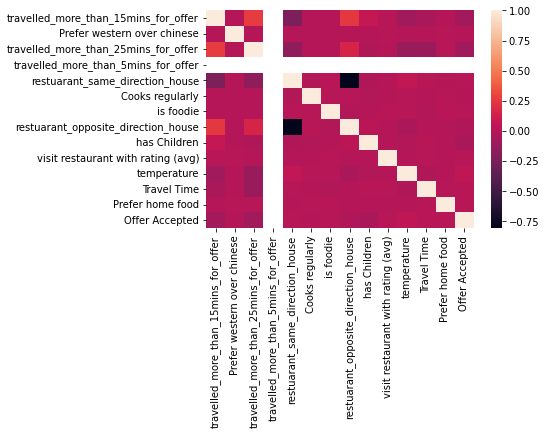

In [8]:
sns.heatmap(train_data.corr())

In [9]:
#Categorical variables
train_data.describe(include=['O'])

,offer expiration,income_range,no_visited_Cold drinks,Restaur_spend_less_than20,Marital Status,restaurant type,age,no_visited_bars,gender,car,Customer type,Qualification,no_Take-aways,Job/Job Industry,Restaur_spend_greater_than20,Climate,drop location
count,12379,12379,12181,12258,12379,12379,12379,12286,12379,111,12379,12379,12235,12379,12219,12379,12379
unique,2,9,5,5,5,5,8,5,2,5,4,6,5,25,5,3,3
top,2days,₹25000 - ₹37499,less1,1~3,Married partner,Cold drinks,21,never,Female,Car that is too old to install Onstar :D,Individual,Some college - no degree,1~3,Unemployed,less1,Summer,Location A
freq,6791,2010,3304,5248,4987,3471,2602,5064,6335,24,5931,4264,4650,1838,5992,8065,5590


#### Chi square test for Independence

In [ ]:
#function to calculate chisqaure metrics
def chi_sq_test(A,B):
    contingTab=pd.crosstab(A,B)
    l=[]
    for i in list(list(contingTab.index)):
            l.append(contingTab.transpose()[i][0:2].values)
    contab=np.array(l)
    chi2,p,dof,expected=stats.chi2_contingency(contab)
    print(f'chi2 : {chi2}\np-value : {p}\ndof : {dof}\nExpected frequency : {expected}')

#### Offer Expiration vs Offer Accepted

In [ ]:
sns.catplot(x="offer expiration",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1.2)
plt.xlabel("Offer Expiration")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Offer Expiration vs. Offer Acceptance")
plt.show()

In [ ]:
contingTab=pd.crosstab(train_data['offer expiration'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['offer expiration'],train_data['Offer Accepted'])

#### Income Range vs Offer Accepted

In [ ]:
sns.catplot(x="income_range",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=5,aspect=2.5)
plt.xlabel("Income Range")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Income range vs. Offer Acceptance")
plt.show()

In [ ]:
contingTab=pd.crosstab(train_data['income_range'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['income_range'],train_data['Offer Accepted'])

In [ ]:
print("IncomeRange correlation: \n",train_data[['income_range','Offer Accepted']].groupby(['income_range'], as_index=False).mean())

#### Marital Status vs Offer Accepted

In [ ]:
sns.catplot(x="Marital Status",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1.8)
plt.xlabel("Marital Status")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Marital Status vs. Offer Acceptance")
plt.show()

In [ ]:
contingTab=pd.crosstab(train_data['Marital Status'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['Marital Status'],train_data['Offer Accepted'])

In [ ]:
print("Marital Status correlation: \n",train_data[['Marital Status','Offer Accepted']].groupby(['Marital Status'], as_index=False).mean())

#### Climate vs Offer Accepted

In [ ]:
sns.catplot(x="Climate",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1.2)
plt.xlabel("Climate")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Climate vs. Offer Acceptance")
plt.show()

#### drop loaction vs Offer Accepted

In [ ]:
counts_df=pd.crosstab(train_data['drop location'],train_data['Offer Accepted'])
counts_df

In [ ]:
accepted_percents_df = counts_df.T.div(counts_df.T.sum()).T
fig, ax = plt.subplots()

accepted_percents_df.plot(kind="bar", stacked=True, color=["firebrick", "seagreen"], ax=ax)

ax.set_xlabel("Drop Location")
ax.set_xticklabels(['Location 1', 'Location 2', 'Location 3'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Didn't Accept")
]
ax.legend(handles=color_patches)

fig.suptitle("Drop Location vs Offer Accepted");

#### AGe vs Offer Accepted

In [ ]:
sns.catplot(x="age",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1.4)
plt.xlabel("Age")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Age vs. Offer Acceptance")
plt.show()

In [ ]:
contingTab=pd.crosstab(train_data['age'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['age'],train_data['Offer Accepted'])

#### Restaurant Type vs Offer Acceptance

In [ ]:
sns.catplot(x="restaurant type",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=2)
plt.xlabel("Age")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Restaurant Type vs. Offer Acceptance")
plt.show()

In [ ]:
print("Restaurant Type: \n",train_data[['restaurant type','Offer Accepted']].groupby(['restaurant type'], as_index=False).mean())

#### Has Children vs offer Acceptance

In [ ]:
sns.catplot(x="has Children",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1)
plt.xlabel("Has Children")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Has Children vs. Offer Acceptance")
plt.show()

In [ ]:
contingTab=pd.crosstab(train_data['has Children'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['has Children'],train_data['Offer Accepted'])

#### Prefer Home Food vs Offer Accepted

In [ ]:
contingTab=pd.crosstab(train_data['Prefer home food'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['Prefer home food'],train_data['Offer Accepted'])

p-value=0.33>0.05 , implies variables are not corelated

#### Cooks regularly vs Offer Accepted

In [ ]:
contingTab=pd.crosstab(train_data['Cooks regularly'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['Cooks regularly'],train_data['Offer Accepted'])

`Cooks Regularly` and `Offer Accepted` independent

#### Is Foodie vs Offer Accepted

In [ ]:
sns.catplot(x="is foodie",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1)
plt.xlabel("Is Foodie")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Is foodie vs. Offer Acceptance")
plt.show()

In [ ]:
contingTab=pd.crosstab(train_data['is foodie'],train_data['Offer Accepted'],margins=True)
contingTab

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['is foodie'],train_data['Offer Accepted'])

`is foodie` and `Offer Accepted` independent

#### Customer Type vs Offer Accepted

In [ ]:
sns.catplot(x="Customer type",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1.5)
plt.xlabel("Customer Type")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Customer Type vs. Offer Acceptance")
plt.show()

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['Customer type'],train_data['Offer Accepted'])

#### restuarant_same_direction_house vs Offer Accepted

In [ ]:
sns.catplot(x="restuarant_same_direction_house",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1)
plt.xlabel("Restuarant_same_direction_house")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Restuarant_same_direction_house vs. Offer Acceptance")
plt.show()

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['restuarant_same_direction_house'],train_data['Offer Accepted'])

`Restuarant_same_direction_house` and `Offer Accepted` independent

#### Prefer western over chinese vs Offer Accepted

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['Prefer western over chinese'],train_data['Offer Accepted'])

`Prefer western over chinese` and `Offer Accepted` independent

In [ ]:
sns.catplot(x="restuarant_same_direction_house",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1)
plt.xlabel("travelled_more_than_5mins_for_offer")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Restuarant_same_direction_house vs. Offer Acceptance")
plt.show()

#### travelled_more_than_5mins_for_offer

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['travelled_more_than_5mins_for_offer'],train_data['Offer Accepted'])

#### visit restaurant with rating (avg) vs Offer Accepted

In [ ]:
sns.catplot(x="visit restaurant with rating (avg)",hue="Offer Accepted",data=train_data,kind='count',palette={1:"seagreen",0:"firebrick"},legend=False,height=4,aspect=1.8)
plt.xlabel("visit restaurant with rating (avg)")

color_patches = [
    Patch(facecolor="seagreen", label="Offer Accepted"),
    Patch(facecolor="firebrick", label="Offer Rejected")
]
plt.legend(handles=color_patches)

plt.title("Restaraunt Rating Visited vs. Offer Acceptance")
plt.show()

In [ ]:
# if p-value> 0.05 (confidence ratio) we accept null hypothesis that categorical variables are independent
chi_sq_test(train_data['visit restaurant with rating (avg)'],train_data['Offer Accepted'])

#### Job/Job Industry

In [ ]:
print("Job/Job Industry correlation: \n",train_data[['Job/Job Industry','Offer Accepted']].groupby(['Job/Job Industry'], as_index=False).mean())

## Data Preprocessing
#### Checking for Missing Values

In [9]:
#Training Data
train_data.isna().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [10]:
# Test data
test_data.isna().sum()

offer expiration                           0
income_range                               0
no_visited_Cold drinks                    90
travelled_more_than_15mins_for_offer       0
Restaur_spend_less_than20                 61
Marital Status                             0
restaurant type                            0
age                                        0
Prefer western over chinese                0
travelled_more_than_25mins_for_offer       0
travelled_more_than_5mins_for_offer        0
no_visited_bars                           50
gender                                     0
car                                     5262
restuarant_same_direction_house            0
Cooks regularly                            0
Customer type                              0
Qualification                              0
is foodie                                  0
no_Take-aways                             60
Job/Job Industry                           0
restuarant_opposite_direction_house        0
has Childr

1. `Car` feature can be removed as it contains many missing values both in train and test set
2. `Prefer western over chinese`,`is foodie`, `restuarant_same_direction_house`,`Cooks regularly`, `Prefer home food`,`travelled_more_than_5mins_for_offer` can be remvoed based on **Chi-square Test**

In [11]:
#Label 
train_label=train_data['Offer Accepted']

In [12]:
# Removing car feature because of large missing values
train_data=train_data.drop(['car','Prefer western over chinese','is foodie','Prefer home food',
                           'restuarant_same_direction_house','Cooks regularly','travelled_more_than_5mins_for_offer','Offer Accepted'],axis=1)
test_data=test_data.drop(['car','Prefer western over chinese','is foodie','Prefer home food',
                           'restuarant_same_direction_house','Cooks regularly','travelled_more_than_5mins_for_offer'],axis=1)

#### Imputing missing values

In [13]:
si=SimpleImputer(strategy='most_frequent')
train_data['no_visited_Cold drinks']=si.fit_transform(train_data[['no_visited_Cold drinks']])
train_data['Restaur_spend_less_than20']=si.fit_transform(train_data[['Restaur_spend_less_than20']])
train_data['no_visited_bars']=si.fit_transform(train_data[['no_visited_bars']])
train_data['no_Take-aways']=si.fit_transform(train_data[['no_Take-aways']])
train_data['Restaur_spend_greater_than20']=si.fit_transform(train_data[['Restaur_spend_greater_than20']])

In [14]:
train_data.isna().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
travelled_more_than_25mins_for_offer    0
no_visited_bars                         0
gender                                  0
Customer type                           0
Qualification                           0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                             0
Restaur_spend_greater_than20            0
Travel Time                             0
Climate                                 0
drop location                           0
dtype: int64

In [15]:
test_data['no_visited_Cold drinks']=si.fit_transform(test_data[['no_visited_Cold drinks']])
test_data['Restaur_spend_less_than20']=si.fit_transform(test_data[['Restaur_spend_less_than20']])
test_data['no_visited_bars']=si.fit_transform(test_data[['no_visited_bars']])
test_data['no_Take-aways']=si.fit_transform(test_data[['no_Take-aways']])
test_data['Restaur_spend_greater_than20']=si.fit_transform(test_data[['Restaur_spend_greater_than20']])

In [16]:
test_data.isna().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
travelled_more_than_25mins_for_offer    0
no_visited_bars                         0
gender                                  0
Customer type                           0
Qualification                           0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                             0
Restaur_spend_greater_than20            0
Travel Time                             0
Climate                                 0
drop location                           0
dtype: int64

In [17]:
ordfeatures=['offer expiration','gender']
oe=OrdinalEncoder()
train_data['offer expiration']=oe.fit_transform(train_data[['offer expiration']])
train_data['gender']=oe.fit_transform(train_data[['gender']])
test_data['offer expiration']=oe.fit_transform(test_data[['offer expiration']])
test_data['gender']=oe.fit_transform(test_data[['gender']])

In [18]:
train_data2=pd.get_dummies(train_data)
test_data2=pd.get_dummies(test_data)

In [19]:
train_data2=pd.get_dummies(train_data2,columns=["temperature","Travel Time"])
test_data2=pd.get_dummies(test_data2,columns=["temperature","Travel Time"])

In [20]:
train_data2=train_data2.astype('int64')
test_data2=test_data2.astype('int64')

In [21]:
train_data2.shape,test_data2.shape

((12379, 108), (5305, 108))

In [22]:
train_data2.head()

,offer expiration,travelled_more_than_15mins_for_offer,travelled_more_than_25mins_for_offer,gender,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,...,drop location_Location B,drop location_Location C,temperature_40,temperature_67,temperature_89,Travel Time_7,Travel Time_10,Travel Time_14,Travel Time_18,Travel Time_22
0,1,1,0,0,0,0,4,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,3,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,1,0,0,1,1,4,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,1,0,1,3,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,1,1,1,0,1,0,3,0,1,0,...,0,1,1,0,0,1,0,0,0,0


#### Splitting data into Train,test

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data2,train_label,test_size=0.1,random_state=65)

In [24]:
# Stratified Split Cross Validation
stratified_split_cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=65)

## Training the Models

#### `Logistic Regression`

In [25]:
# Logistic Regression
lr=LogisticRegression(solver='liblinear',random_state=65)
lr.fit(X_train,Y_train)
lr_test_score=lr.score(X_test,Y_test)
lr_train_score=lr.score(X_train,Y_train)
acc_log = round(lr_test_score * 100, 2)
print(f'Train Accuracy Score: {round(lr_train_score*100,2)}\nTest Accuracy Score: {acc_log}\nF1_score: {round(100*f1_score(Y_test,lr.predict(X_test)),2)}')

Train Accuracy Score: 62.12
Test Accuracy Score: 63.25
F1_score: 70.55


In [25]:
# #Hyperparameter Tuning
# lr=LogisticRegression(solver='liblinear',penalty='l2')
# c_values=[0,1e-4,1e-3,1e-2,1e-1,1.0,10.0,100.0]
# grid=dict(C=c_values)
# grid_search=GridSearchCV(lr,param_grid=grid,n_jobs=2,cv=stratified_split_cv,scoring='f1',
#                        return_train_score=True)
# grid_result=grid_search.fit(X_train,Y_train)

In [26]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# lrscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {lrscore}')

In [34]:
# Best Estimator After Hyperparameter Tuning
hpt_lr=LogisticRegression(solver='liblinear',C=0.0001,random_state=65)
hpt_lr.fit(X_train,Y_train)
hpt_lr_test_score=hpt_lr.score(X_test,Y_test)
hpt_lr_train_score=hpt_lr.score(X_train,Y_train)
acc_log = round(hpt_lr_test_score * 100, 2)
f1_log=round(100*f1_score(Y_test,hpt_lr.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_lr_train_score*100,2)}\nTest Accuracy Score: {acc_log}\nF1_score: {f1_log}')

Train Accuracy Score: 56.4
Test Accuracy Score: 57.51
F1_score: 73.03


#### `Ridge Classifier`

In [33]:
# Ridge Classifier
rc=RidgeClassifier(solver='auto',alpha=0,random_state=65)
rc.fit(X_train,Y_train)
rc_test_score=rc.score(X_test,Y_test)
rc_train_score=rc.score(X_train,Y_train)
acc_rc = round(rc_test_score * 100, 2)
print(f'Train Accuracy Score: {round(rc_train_score*100,2)}\nTest Accuracy Score: {acc_rc}\nF1_score: {round(100*f1_score(Y_test,rc.predict(X_test)),2)}')

Train Accuracy Score: 61.52
Test Accuracy Score: 62.44
F1_score: 68.9


In [29]:
# #Hyperparameter Tuning
# alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10]
# grid=dict(alpha=alpha)
# grid_search=GridSearchCV(rc,param_grid=grid,n_jobs=2,cv=stratified_split_cv,scoring='f1',
#                        return_train_score=True)
# grid_result=grid_search.fit(X_train,Y_train)

In [30]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

In [35]:
# Best Estimator After Hyperparameter Tuning
hpt_rc=RidgeClassifier(solver='auto',alpha=10,random_state=65)
hpt_rc.fit(X_train,Y_train)
hpt_rc_test_score=hpt_rc.score(X_test,Y_test)
hpt_rc_train_score=hpt_rc.score(X_train,Y_train)
acc_rc = round(hpt_rc_test_score * 100, 2)
f1_rc=round(100*f1_score(Y_test,hpt_rc.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_rc_train_score*100,2)}\nTest Accuracy Score: {acc_rc}\nF1_score: {f1_rc}')

Train Accuracy Score: 62.19
Test Accuracy Score: 63.33
F1_score: 70.63


#### `Gaussian Naive Bayes`

In [36]:
# Gaussian Naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_test_score=gaussian.score(X_test,Y_test)
gaussian_train_score=gaussian.score(X_train,Y_train)
acc_gaussian = round(gaussian_test_score * 100, 2)
print(f'Train Accuracy Score: {round(gaussian_train_score*100,2)}\nTest Accuracy Score: {acc_gaussian}\nF1_score: {round(100*f1_score(Y_test,gaussian.predict(X_test)),2)}')

Train Accuracy Score: 58.22
Test Accuracy Score: 60.1
F1_score: 62.69


In [33]:
# #Hyperparameter Tuning
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# grid_search=GridSearchCV(gaussian,param_grid=params_NB,n_jobs=2,cv=stratified_split_cv,scoring='f1',
#                        return_train_score=True)

# grid_result=grid_search.fit(X_train,Y_train)

In [56]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

In [39]:
# Best Estimator After Hyperparameter Tuning
hpt_gaussian = GaussianNB(var_smoothing=0.43287612810830584)
hpt_gaussian.fit(X_train, Y_train)
hpt_gaussian_test_score=hpt_gaussian.score(X_test,Y_test)
hpt_gaussian_train_score=hpt_gaussian.score(X_train,Y_train)
acc_gaussian = round(hpt_gaussian_test_score * 100, 2)
f1_gaussian= round(100*f1_score(Y_test,hpt_gaussian.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_gaussian_train_score*100,2)}\nTest Accuracy Score: {acc_gaussian}\nF1_score: {f1_gaussian}')

Train Accuracy Score: 58.36
Test Accuracy Score: 60.26
F1_score: 73.86


#### `K-Nearest Neighnours(KNN)`

In [40]:
#KNN
knn = KNeighborsClassifier(n_neighbors=55)# n=31 from HPT
knn.fit(X_train, Y_train)
knn_test_score=knn.score(X_test,Y_test)
knn_train_score=knn.score(X_train,Y_train)
acc_knn = round(knn_test_score * 100, 2)
f1_knn=round(100*f1_score(Y_test,knn.predict(X_test)),2)
print(f'Train Accuracy Score: {round(knn_train_score*100,2)}\nTest Accuracy Score: {acc_knn}\nF1_score: {f1_knn}')

Train Accuracy Score: 63.76
Test Accuracy Score: 62.44
F1_score: 71.84


In [ ]:
# #Hyperparameter Tuning
# n_neighbors = range(20,60)
# grid = dict(n_neighbors=n_neighbors)
# grid_search=GridSearchCV(knn,param_grid=grid,n_jobs=-1,cv=stratified_split_cv,scoring='accuracy',
#                          error_score=0,return_train_score=True)

# grid_result=grid_search.fit(X_train,Y_train)

In [ ]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

#### `Support Vector Machine (SVM)`

In [42]:
# SVC
svc=SVC(random_state=65)
svc.fit(X_train,Y_train)
svc_test_score=svc.score(X_test,Y_test)
svc_train_score=svc.score(X_train,Y_train)
acc_svc = round(svc_test_score * 100, 2)
print(f'Train Accuracy Score: {round(svc_train_score*100,2)}\nTest Accuracy Score: {acc_svc}\nF1_score: {round(100*f1_score(Y_test,svc.predict(X_test)),2)}')

Train Accuracy Score: 74.41
Test Accuracy Score: 62.84
F1_score: 70.85


In [ ]:
# ConfusionMatrixDisplay.from_estimator(svc,X_train,Y_train)

In [66]:
# #Hyperparameter Tuning
# kernel = ['poly','rbf','sigmoid']
# C = [10, 1.0, 0.1, 0.01]
# gamma = ['scale']
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# grid_search=GridSearchCV(svc,param_grid=grid,n_jobs=-1,cv=stratified_split_cv,scoring='f1',
#                        return_train_score=True)

# grid_result=grid_search.fit(X_train,Y_train)

In [67]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')


Best Score: 0.7224476177588929
Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Test_score: 0.7413695529145444


In [43]:
# Best Estimator After Hyperparameter Tuning
hpt_svc=SVC(C=0.1,gamma='scale',kernel='rbf',random_state=65)
hpt_svc.fit(X_train,Y_train)
hpt_svc_test_score=hpt_svc.score(X_test,Y_test)
hpt_svc_train_score=hpt_svc.score(X_train,Y_train)
acc_svc = round(hpt_svc_test_score * 100, 2)
f1_svc=round(100*f1_score(Y_test,hpt_svc.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_svc_train_score*100,2)}\nTest Accuracy Score: {acc_svc}\nF1_score:{f1_svc}')

Train Accuracy Score: 62.53
Test Accuracy Score: 63.09
F1_score:74.14


`Linear SVC`

In [48]:
# Linear SVC
lsvc = LinearSVC(random_state=65,max_iter=1500)
lsvc.fit(X_train, Y_train)
lsvc_test_score=lsvc.score(X_test,Y_test)
lsvc_train_score=lsvc.score(X_train,Y_train)
acc_lsvc = round(lsvc_test_score * 100, 2)
print(f'Train Accuracy Score: {round(lsvc_train_score*100,2)}\nTest Accuracy Score: {acc_lsvc}\nF1_score: {round(100*f1_score(Y_test,lsvc.predict(X_test)),2)}')

Train Accuracy Score: 62.13
Test Accuracy Score: 63.33
F1_score: 70.63


In [45]:
# #Hyperparameter Tuning
# C = [50, 10, 1.0, 0.1, 0.01]
# grid = dict(C=C)
# grid_search=GridSearchCV(lsvc,param_grid=grid,n_jobs=-1,cv=stratified_split_cv,scoring='f1',
#                        return_train_score=True)

# grid_result=grid_search.fit(X_train,Y_train)

In [46]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

Best Score: 0.6872216151721815
Params: {'C': 0.01}
Test_score: 0.707175177763413


In [49]:
# Best Estimator After Hyperparameter Tuning
hpt_lsvc = LinearSVC(C=0.01,random_state=65)
hpt_lsvc.fit(X_train, Y_train)
hpt_lsvc_test_score=hpt_lsvc.score(X_test,Y_test)
hpt_lsvc_train_score=hpt_lsvc.score(X_train,Y_train)
acc_lsvc = round(hpt_lsvc_test_score * 100, 2)
f1_lsvc=round(100*f1_score(Y_test,hpt_lsvc.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_lsvc_train_score*100,2)}\nTest Acurracy Score: {acc_lsvc}\nF1_score: {f1_lsvc}')

Train Accuracy Score: 62.17
Test Acurracy Score: 63.41
F1_score: 70.72


#### `Perceptron`

In [51]:
#Perceptron
percp=Perceptron(random_state=65)
percp.fit(X_train,Y_train)
percp_test_score=percp.score(X_test,Y_test)
percp_train_score=percp.score(X_train,Y_train)
acc_percp = round(percp_test_score * 100, 2)
print(f'Train Accuracy Score: {round(percp_train_score*100,2)}\nTest Accuracy Score: {acc_percp}\nF1_score: {round(100*f1_score(Y_test,percp.predict(X_test)),2)}')

Train Accuracy Score: 57.52
Test Accuracy Score: 58.8
F1_score: 71.82


#### `Decision Tree Classifier`

In [53]:
# Decision Tree Classifier
dct=DecisionTreeClassifier(random_state=65)
dct.fit(X_train,Y_train)
dct_test_score=dct.score(X_test,Y_test)
dct_train_score=dct.score(X_train,Y_train)
acc_dct = round(dct_test_score * 100, 2)
print(f'Train Accuracy Score: {round(dct_train_score*100,2)}\nTest Accuracy Score: {acc_dct}\nF1_score: {round(100*f1_score(Y_test,dct.predict(X_test)),2)}')

Train Accuracy Score: 99.98
Test Accuracy Score: 54.2
F1_score: 59.82


In [66]:
# #Hyperparameter Tuning
# params = {
#     'max_features':['sqrt','log2'],
#     'max_depth': [2, 3,8,10,12, 20],
#     'min_samples_leaf': [5, 10, 15,20, 50],
#     'criterion': ["gini", "entropy"]
# }
# grid_search=GridSearchCV(dct,param_grid=params,n_jobs=-1,cv=stratified_split_cv,scoring='f1',
#                        return_train_score=True)
# grid_result=grid_search.fit(X_train,Y_train)

In [65]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

In [61]:
# Best Estimator After Hyperparameter Tuning
hpt_dct=DecisionTreeClassifier(criterion='entropy',max_depth=2,max_features='sqrt',min_samples_leaf=15,random_state=65)
hpt_dct.fit(X_train,Y_train)
hpt_dct_test_score=hpt_dct.score(X_test,Y_test)
hpt_dct_train_score=hpt_dct.score(X_train,Y_train)
acc_dct = round(hpt_dct_test_score * 100, 2)
f1_dct=round(100*f1_score(Y_test,hpt_dct.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_dct_train_score*100,2)}\nTest Accuracy Score: {acc_dct}\nF1_score: {f1_dct}')

Train Accuracy Score: 57.36
Test Accuracy Score: 58.64
F1_score: 72.23


#### `Random Forest Classifier`

In [62]:
#Random Forest Classifier
raf=RandomForestClassifier(random_state=65)
raf.fit(X_train,Y_train)
raf_test_score=raf.score(X_test,Y_test)
raf_train_score=raf.score(X_train,Y_train)
acc_raf = round(raf_test_score * 100, 2)
print(f'Train  Accuracy Score: {round(raf_train_score*100,2)}\nTest Accuracy Score: {acc_raf}\nF1_score :{round(100*f1_score(Y_test,raf.predict(X_test)),2)}')

Train  Accuracy Score: 99.98
Test Accuracy Score: 62.2
F1_score :69.53


In [68]:
# #Hyperparameter Tuning
# params = {
#     'max_features':['sqrt','log2'],
#     'n_estimators':[10,100,1000],
#     'max_depth': [2, 3,8,10],
# }
# grid_search=GridSearchCV(raf,param_grid=params,n_jobs=-1,cv=stratified_split_cv,scoring='f1',
#                        return_train_score=True)
# grid_result=grid_search.fit(X_train,Y_train)

In [69]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

Best Score: 0.7305750621327957
Params: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 1000}
Test_score: 0.7438395415472778


In [64]:
# Best Estimator After Hyperparameter Tuning
hpt_raf=RandomForestClassifier(max_depth=10,max_features='sqrt',n_estimators=1000,random_state=65)
hpt_raf.fit(X_train,Y_train)
hpt_raf_test_score=hpt_raf.score(X_test,Y_test)
hpt_raf_train_score=hpt_raf.score(X_train,Y_train)
acc_raf = round(hpt_raf_test_score * 100, 2)
f1_raf=round(100*f1_score(Y_test,hpt_raf.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_raf_train_score*100,2)}\nTest Accuracy Score: {acc_raf}\nf1_score: {f1_raf}')

Train Accuracy Score: 77.55
Test Accuracy Score: 64.38
f1_score: 73.92


#### `Bagging Classifier`

In [73]:
# Bagging Classifier
bc=BaggingClassifier(random_state=65,bootstrap_features=True)
bc.fit(X_train,Y_train)
bc_test_score=bc.score(X_test,Y_test)
bc_train_score=bc.score(X_train,Y_train)
acc_bc = round(bc_test_score * 100, 2)
print(f'Train Accuracy Score: {round(bc_train_score*100,2)}\nTest Accuracy Score: {acc_bc}\nF1_score :{round(100*f1_score(Y_test,bc.predict(X_test)),2)}')

Train Score: 98.94
Test Score: 57.75
F1_score :60.88


In [74]:
# params={'n_estimators':[10,100, 300,1000],
#     'max_samples' :[5, 10, 25, 50, 100],
#     'max_features' :[1,2,5,10,20,30],
#         'bootstrap_features':[True,False],
#        }
# grid_search=GridSearchCV(bc,param_grid=params,scoring='f1',
#                          return_train_score=True,cv=stratified_split_cv,n_jobs=-1)
# grid_result=grid_search.fit(X_train,Y_train)

In [75]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

Best Score: 0.7238420082389626
Params: {'bootstrap_features': False, 'max_features': 30, 'max_samples': 100, 'n_estimators': 1000}
Test_score: 0.74326553051127


In [79]:
# Best Estimator After Hyperparameter Tuning
hpt_bc=BaggingClassifier(max_features=30,max_samples=100,n_estimators=1000,bootstrap_features='False',random_state=65)
hpt_bc.fit(X_train,Y_train)
hpt_bc_test_score=hpt_bc.score(X_test,Y_test)
hpt_bc_train_score=hpt_bc.score(X_train,Y_train)
acc_bc = round(hpt_bc_test_score * 100, 2)
f1_bc=round(100*f1_score(Y_test,hpt_bc.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_bc_train_score*100,2)}\nTest Accuracy Score: {acc_bc}\nF1_score :{f1_bc}')

Train Accuracy Score: 61.32
Test Accuracy Score: 61.23
F1_score :73.66


#### `Gradient Boosting Classifier`

In [40]:
gbc=GradientBoostingClassifier(random_state=65)
gbc.fit(X_train,Y_train)
gbc_test_score=gbc.score(X_test,Y_test)
gbc_train_score=gbc.score(X_train,Y_train)
acc_gbc = round(gbc_test_score * 100, 2)
print(f'Train Accuracy Score: {round(gbc_train_score*100,2)}\nTest Accuracy Score: {acc_gbc}\nF1_score :{round(100*f1_score(Y_test,gbc.predict(X_test)),2)}')

Train Accuracy Score: 65.88
Test Accuracy Score: 62.6
F1_score :70.53


In [ ]:
# params = {'n_estimators':[10, 100, 1000],
# 'learning_rate':[0.001, 0.01, 0.1],
# 'max_depth':[3, 7, 9],
# }
# grid_search=GridSearchCV(gbc,param_grid=params,scoring='f1',
#                          return_train_score=True,cv=stratified_split_cv,n_jobs=-1)
# grid_result=grid_search.fit(X_train,Y_train)

In [42]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

Best Score: 0.7239388021716676
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Test_score: 0.7340782122905029


In [ ]:
hpt_gbc=GradientBoostingClassifier(random_state=65,learning_rate=0.01,max_depth=3,n_estimators=100)
hpt_gbc.fit(X_train,Y_train)
hpt_gbc_test_score=hpt_gbc.score(X_test,Y_test)
hpt_gbc_train_score=hpt_gbc.score(X_train,Y_train)
acc_gbc = round(hpt_gbc_test_score * 100, 2)
f1_gbc=round(100*f1_score(Y_test,hpt_gbc.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_gbc_train_score*100,2)}\nTest Accuracy Score: {acc_gbc}\nF1_score: {f1_gbc}')

In [ ]:
nn


#### `AdaBoost Classifier`

In [28]:
abc=AdaBoostClassifier(random_state=65)
abc.fit(X_train,Y_train)
abc_test_score=abc.score(X_test,Y_test)
abc_train_score=abc.score(X_train,Y_train)
acc_abc = round(abc_test_score * 100, 2)
print(f'Train Accuracy Score: {round(abc_train_score*100,2)}\nTest Accuracy Score: {acc_abc}\nF1_score :{round(100*f1_score(Y_test,abc.predict(X_test)),2)}')

Train Score: 62.07
Test Score: 63.0
F1_score :70.14


In [30]:
# params = {'n_estimators':[10,50,100, 500,1000],
#           'learning_rate':[0.001, 0.01, 0.1],
# }
# grid_search=GridSearchCV(abc,param_grid=params,scoring='f1',
#                          return_train_score=True,cv=stratified_split_cv,n_jobs=-1)
# grid_result=grid_search.fit(X_train,Y_train)

In [31]:
# print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
# rcscore=grid_result.score(X_test,Y_test)
# print(f'Test_score: {rcscore}')

Best Score: 0.7209489394945688
Params: {'learning_rate': 0.01, 'n_estimators': 100}
Test_score: 0.7348837209302326


In [34]:
# Best Estimator After Hyperparameter Tuning
hpt_abc=AdaBoostClassifier(learning_rate=0.01,n_estimators=1000,random_state=65)
hpt_abc.fit(X_train,Y_train)
hpt_abc_test_score=hpt_abc.score(X_test,Y_test)
hpt_abc_train_score=hpt_abc.score(X_train,Y_train)
acc_abc = round(hpt_abc_test_score * 100, 2)
f1_abc=round(100*f1_score(Y_test,hpt_abc.predict(X_test)),2)
print(f'Train Accuracy Score: {round(hpt_abc_train_score*100,2)}\nTest Accuracy Score: {acc_abc}\nF1_score: {f1_abc}')

Train Accuracy Score: 60.82
Test Accuracy Score: 63.0
F1_score: 73.15


#### `XGBoost Classifier`

In [37]:
# XG boost
xgb=XGBClassifier(random_state=65)
xgb.fit(X_train,Y_train)
xgb_test_score=xgb.score(X_test,Y_test)
xgb_train_score=xgb.score(X_train,Y_train)
acc_xgb = round(xgb_test_score * 100, 2)
print(f'Train Accuracy Score: {round(xgb_train_score*100,2)}\nTest Accuracy Score: {acc_xgb}\nF1_score :{round(100*f1_score(Y_test,xgb.predict(X_test)),2)}')

Train Accuracy Score: 90.31
Test Accuracy Score: 63.25
F1_score :69.24


In [38]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 65,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [ ]:
params = {'n_estimators':[10,50,100, 500,1000],
          'learning_rate':[0.001, 0.01, 0.1],
}
grid_search=GridSearchCV(abc,param_grid=params,scoring='f1',
                         return_train_score=True,cv=stratified_split_cv,n_jobs=-1)
grid_result=grid_search.fit(X_train,Y_train)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlpc=MLPClassifier()
mlpc.fit(X_train,Y_train)
mlpc_test_score=mlpc.score(X_test,Y_test)
mlpc_train_score=mlpc.score(X_train,Y_train)
acc_mlpc = round(mlpc_test_score * 100, 2)
print(f'Train Score: {round(mlpc_train_score*100,2)}\nTest Score: {acc_mlpc}')

### Evaluating Best Model

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC','XGBoost', 
              'Decision Tree','Bagging Classifier','GradientBoost Classifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_raf, acc_gaussian, acc_percp, 
               acc_lsvc,acc_xgb, acc_dct,acc_bc,acc_gbc]})
models.sort_values(by='Score', ascending=False)

### Creating CSV

In [ ]:
test_pred=hpt_raf.predict(test_data2)
test_pred

In [ ]:
submission=pd.DataFrame({"id":[i for i in range(len(test_data))],"Offer Accepted":test_pred})
submission['Offer Accepted']=np.where(submission["Offer Accepted"]==0,'No','Yes')

In [ ]:
submission.to_csv('submission.csv',index=False)